<a href="https://colab.research.google.com/github/omelyanchukfit6/ML/blob/main/3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- Завантаження та аналіз даних ---
Розмір датасету: (2338, 14)

Перші рядки датасету:
   Phoenix Feather  Unicorn Horn  Dragon's Blood  Mermaid Tears  Fairy Dust  \
0              2.4          18.7            18.4           27.9         7.9   
1              2.1           6.0            15.0           13.3        15.6   
2             17.2          13.9            23.8            6.8        10.7   
3              8.4           9.7             6.8           26.9         4.6   
4             22.1          10.8            16.4           10.5        22.0   

   Goblin Toes  Witch's Brew  Griffin Claw  Troll Hair  Kraken Ink  \
0          9.6          18.3          13.2         2.5        26.0   
1         13.1          11.0           5.0         7.2        26.0   
2         15.8          19.4           2.7        15.4        21.2   
3         29.1          14.6          19.7        18.0        20.8   
4         23.4           2.6          18.2        23.8        11.3   

   Minotaur Hor

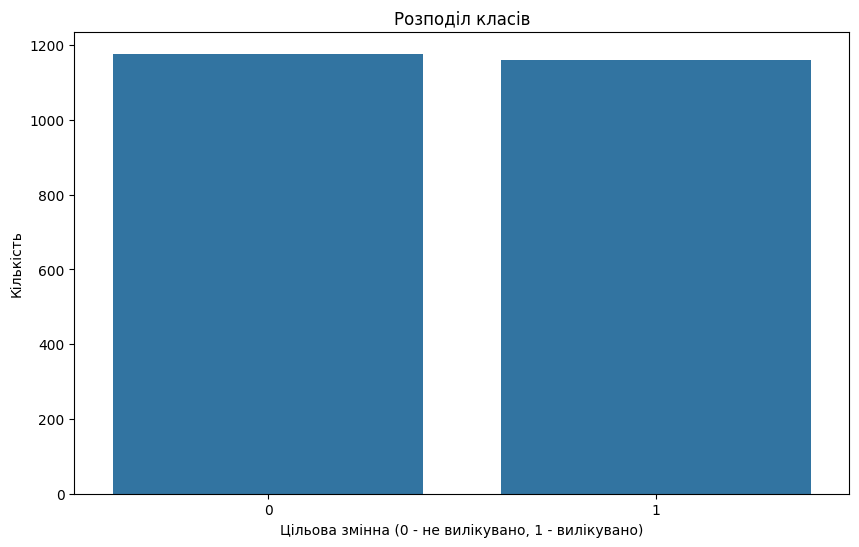


Розміри вибірок:
X_train: (1870, 13)
X_test: (468, 13)
y_train: (1870,)
y_test: (468,)

--- Формування тензорів ---

--- Побудова нейронної мережі ---
LogisticRegressionModel(
  (linear): Linear(in_features=13, out_features=1, bias=True)
)

--- Навчання моделі ---
Епоха [10/100], Втрати: 0.5876, Точність: 0.7235
Епоха [20/100], Втрати: 0.5152, Точність: 0.7963
Епоха [30/100], Втрати: 0.4744, Точність: 0.8166
Епоха [40/100], Втрати: 0.4480, Точність: 0.8278
Епоха [50/100], Втрати: 0.4273, Точність: 0.8369
Епоха [60/100], Втрати: 0.4198, Точність: 0.8412
Епоха [70/100], Втрати: 0.4045, Точність: 0.8487
Епоха [80/100], Втрати: 0.3945, Точність: 0.8529
Епоха [90/100], Втрати: 0.3961, Точність: 0.8583
Епоха [100/100], Втрати: 0.3817, Точність: 0.8572

--- Оцінка моделі PyTorch ---


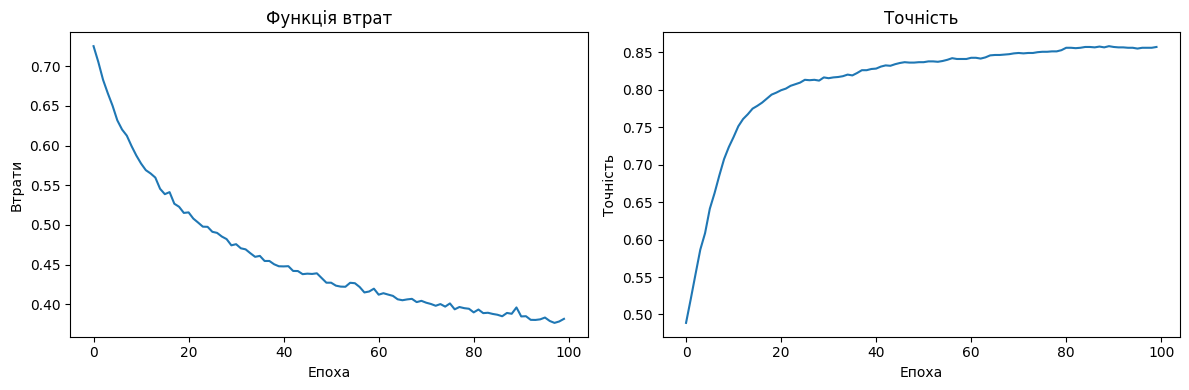

Точність на тестовій вибірці: 88.68%

--- Логістична регресія за допомогою scikit-learn ---
Точність scikit-learn моделі: 89.32%

--- Порівняння моделей ---

Класифікаційний звіт для PyTorch-моделі:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       231
           1       0.90      0.87      0.89       237

    accuracy                           0.89       468
   macro avg       0.89      0.89      0.89       468
weighted avg       0.89      0.89      0.89       468


Матриця плутанини для PyTorch-моделі:


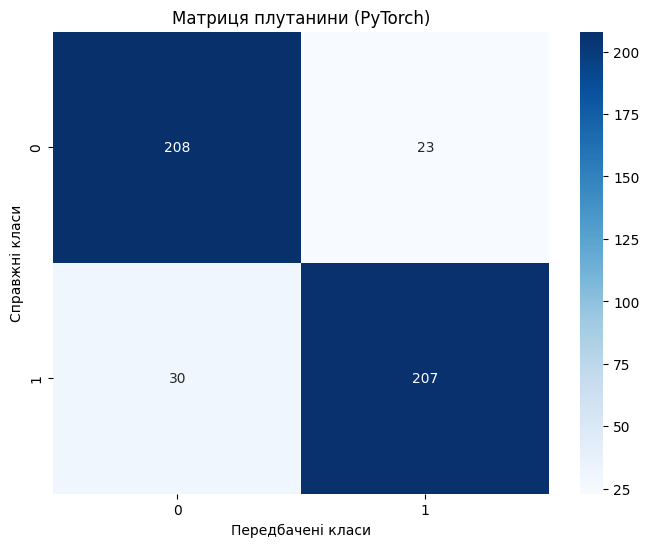


Класифікаційний звіт для scikit-learn моделі:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       231
           1       0.90      0.89      0.89       237

    accuracy                           0.89       468
   macro avg       0.89      0.89      0.89       468
weighted avg       0.89      0.89      0.89       468


Матриця плутанини для scikit-learn моделі:


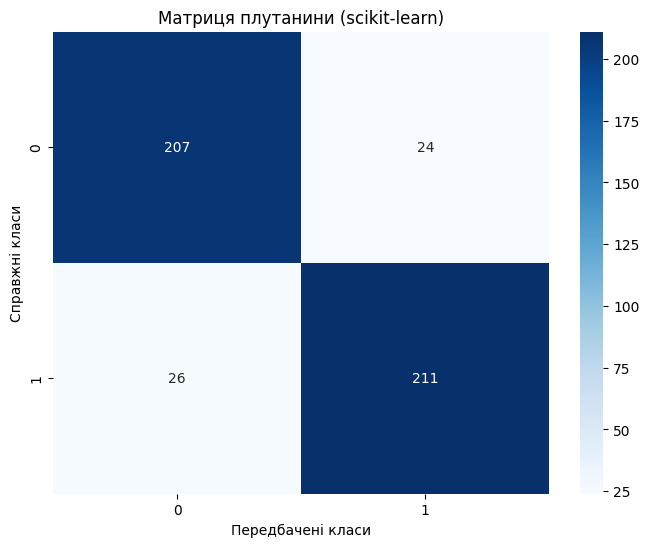


--- Аналіз коефіцієнтів моделей ---

Порівняння коефіцієнтів моделей:
             Ознаки  PyTorch коефіцієнти  scikit-learn коефіцієнти
0   Phoenix Feather            -0.639233                 -1.508833
1      Unicorn Horn            -0.024240                 -0.072118
2    Dragon's Blood             0.079308                  0.237731
3     Mermaid Tears            -0.784419                 -1.787869
4        Fairy Dust            -0.373214                 -0.870992
5       Goblin Toes            -0.323077                 -0.878766
6      Witch's Brew             1.270287                  2.318578
7      Griffin Claw             0.088558                  0.305486
8        Troll Hair             1.867640                  3.375266
9        Kraken Ink            -0.229663                 -0.457336
10    Minotaur Horn             0.037303                  0.042060
11   Basilisk Scale            -0.406224                 -0.818731
12     Chimera Fang             0.070443                  

<Figure size 1000x800 with 0 Axes>

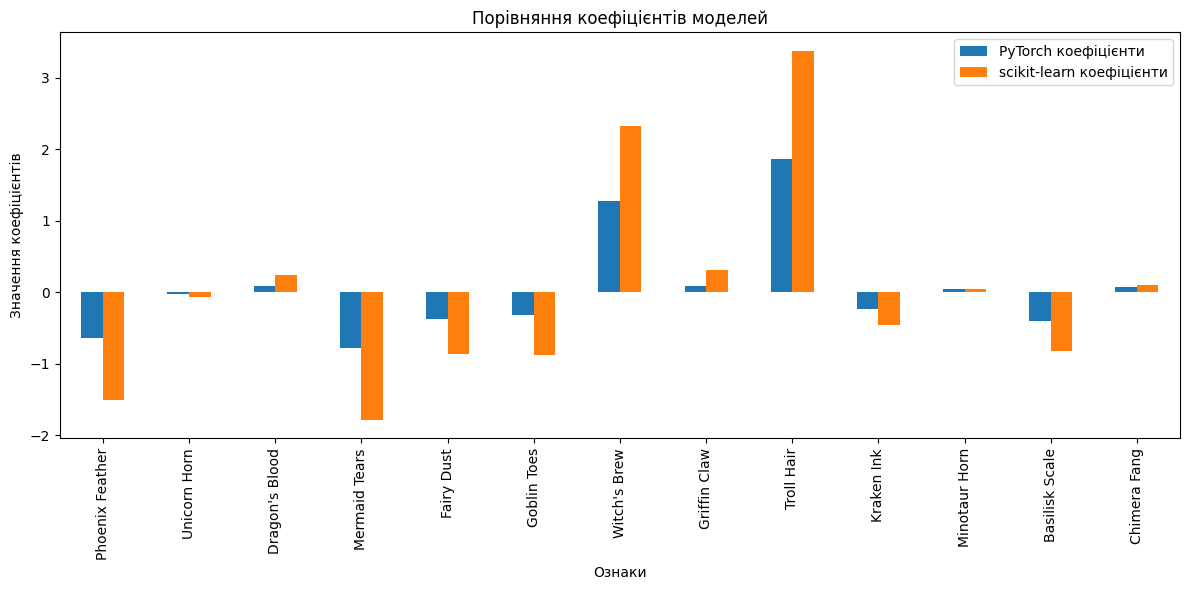


--- Висновок ---
Точність PyTorch моделі: 88.68%
Точність scikit-learn моделі: 89.32%

PyTorch модель збережено у файлі 'pytorch_princess_model.pt'
scikit-learn модель збережено у файлі 'sklearn_princess_model.joblib'


In [2]:

!pip install torch torchvision pandas numpy matplotlib scikit-learn seaborn

import os
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from torch.utils.data import Dataset, DataLoader

# 1. Завантаження даних з локального файлу
print("\n--- Завантаження та аналіз даних ---")
data = pd.read_csv('data.csv')
print("Розмір датасету:", data.shape)
print("\nПерші рядки датасету:")
print(data.head())

# Вивести назви стовпців датасету, щоб знайти цільову змінну
print("\nНазви стовпців у датасеті:")
print(data.columns)

# Припустимо, що останній стовпець - цільова змінна
# Якщо це не так, замініть 'Instantly Healed' на правильну назву цільової змінної
target_column = data.columns[-1]
print(f"\nВикористовуємо стовпець '{target_column}' як цільову змінну")

# 2. Аналіз і підготовка даних
print("\n--- Аналіз даних ---")
print("\nІнформація про датасет:")
print(data.info())

print("\nСтатистичний опис даних:")
print(data.describe())

print("\nКількість пропущених значень у кожному стовпці:")
print(data.isnull().sum())

print("\nРозподіл класів (0 - не вилікувано, 1 - вилікувано):")
print(data[target_column].value_counts())
print(data[target_column].value_counts(normalize=True))

# Візуалізація даних
plt.figure(figsize=(10, 6))
sns.countplot(x=target_column, data=data)
plt.title('Розподіл класів')
plt.xlabel('Цільова змінна (0 - не вилікувано, 1 - вилікувано)')
plt.ylabel('Кількість')
plt.show()

# Розділення ознак і цільової змінної
X = data.drop(target_column, axis=1)
y = data[target_column]

# 3. Поділ на навчальну і тестову вибірки, масштабування ознак
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nРозміри вибірок:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# Масштабування ознак
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Формування тензорів
print("\n--- Формування тензорів ---")
# Перетворення даних в тензори PyTorch
X_train_tensor = torch.FloatTensor(X_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_train_tensor = torch.FloatTensor(y_train.values)
y_test_tensor = torch.FloatTensor(y_test.values)

# Створення власного класу датасету
class PrincessDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Створення датасетів
train_dataset = PrincessDataset(X_train_tensor, y_train_tensor)
test_dataset = PrincessDataset(X_test_tensor, y_test_tensor)

# Створення завантажувачів даних
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 5. Побудова нейронної мережі для логістичної регресії
print("\n--- Побудова нейронної мережі ---")
# Визначення кількості ознак
input_dim = X_train.shape[1]

class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        outputs = torch.sigmoid(self.linear(x))
        return outputs

# Ініціалізація моделі
model = LogisticRegressionModel(input_dim)
print(model)

# 6. Навчання моделі
print("\n--- Навчання моделі ---")
# Налаштування оптимізатора та функції втрат
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Навчання моделі
num_epochs = 100
losses = []
accuracies = []

# Переведення моделі в режим навчання
model.train()
for epoch in range(num_epochs):
    epoch_loss = 0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        # Обнулення градієнтів
        optimizer.zero_grad()

        # Прямий прохід
        outputs = model(inputs)
        outputs = outputs.squeeze()

        # Обчислення втрат
        loss = criterion(outputs, labels)

        # Зворотне поширення помилки
        loss.backward()

        # Оновлення ваг
        optimizer.step()

        # Накопичення втрат
        epoch_loss += loss.item()

        # Підрахунок точності
        predicted = (outputs >= 0.5).float()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    # Збереження втрат та точності для епохи
    epoch_loss /= len(train_loader)
    epoch_acc = correct / total
    losses.append(epoch_loss)
    accuracies.append(epoch_acc)

    if (epoch + 1) % 10 == 0:
        print(f'Епоха [{epoch+1}/{num_epochs}], Втрати: {epoch_loss:.4f}, Точність: {epoch_acc:.4f}')

# 7. Виведення точності і функції втрат
print("\n--- Оцінка моделі PyTorch ---")
# Візуалізація процесу навчання
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Функція втрат')
plt.xlabel('Епоха')
plt.ylabel('Втрати')

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Точність')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.tight_layout()
plt.show()

# Оцінка моделі на тестовій вибірці
model.eval()
with torch.no_grad():
    total = 0
    correct = 0
    y_pred = []

    for inputs, labels in test_loader:
        outputs = model(inputs).squeeze()
        predicted = (outputs >= 0.5).float()
        y_pred.extend(predicted.numpy())

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Точність на тестовій вибірці: {accuracy:.2f}%")

# 8. Побудова логістичної регресії за допомогою scikit-learn
print("\n--- Логістична регресія за допомогою scikit-learn ---")
sklearn_model = LogisticRegression(random_state=42, max_iter=1000)
sklearn_model.fit(X_train_scaled, y_train)

# 9. Оцінка метрик для scikit-learn моделі
sklearn_predictions = sklearn_model.predict(X_test_scaled)
sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)
print(f"Точність scikit-learn моделі: {sklearn_accuracy*100:.2f}%")

# 10. Виведення класифікаційного звіту та матриці плутанини
# Перетворення PyTorch-передбачень у numpy-масив
y_pred_torch = np.array(y_pred)

print("\n--- Порівняння моделей ---")
print("\nКласифікаційний звіт для PyTorch-моделі:")
print(classification_report(y_test, y_pred_torch.round()))

print("\nМатриця плутанини для PyTorch-моделі:")
cm_torch = confusion_matrix(y_test, y_pred_torch.round())
plt.figure(figsize=(8, 6))
sns.heatmap(cm_torch, annot=True, fmt='d', cmap='Blues')
plt.title('Матриця плутанини (PyTorch)')
plt.xlabel('Передбачені класи')
plt.ylabel('Справжні класи')
plt.show()

print("\nКласифікаційний звіт для scikit-learn моделі:")
print(classification_report(y_test, sklearn_predictions))

print("\nМатриця плутанини для scikit-learn моделі:")
cm_sklearn = confusion_matrix(y_test, sklearn_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sklearn, annot=True, fmt='d', cmap='Blues')
plt.title('Матриця плутанини (scikit-learn)')
plt.xlabel('Передбачені класи')
plt.ylabel('Справжні класи')
plt.show()

# Порівняння коефіцієнтів моделей
print("\n--- Аналіз коефіцієнтів моделей ---")
# Отримання коефіцієнтів scikit-learn моделі
sklearn_coef = sklearn_model.coef_[0]

# Отримання коефіцієнтів PyTorch моделі
pytorch_coef = model.linear.weight.data.numpy().flatten()

# Порівняння коефіцієнтів
coef_comparison = pd.DataFrame({
    'Ознаки': X.columns,
    'PyTorch коефіцієнти': pytorch_coef,
    'scikit-learn коефіцієнти': sklearn_coef
})

print("\nПорівняння коефіцієнтів моделей:")
print(coef_comparison)

# Візуалізація коефіцієнтів
plt.figure(figsize=(10, 8))
coef_comparison.plot(x='Ознаки', y=['PyTorch коефіцієнти', 'scikit-learn коефіцієнти'], kind='bar', figsize=(12, 6))
plt.title('Порівняння коефіцієнтів моделей')
plt.ylabel('Значення коефіцієнтів')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("\n--- Висновок ---")
print(f"Точність PyTorch моделі: {accuracy:.2f}%")
print(f"Точність scikit-learn моделі: {sklearn_accuracy*100:.2f}%")

# Збереження моделей
torch.save(model.state_dict(), 'pytorch_princess_model.pt')
print("\nPyTorch модель збережено у файлі 'pytorch_princess_model.pt'")

# Збереження scikit-learn моделі (Потребує бібліотеки joblib)
from joblib import dump
dump(sklearn_model, 'sklearn_princess_model.joblib')
print("scikit-learn модель збережено у файлі 'sklearn_princess_model.joblib'")